<a href="https://colab.research.google.com/github/Sharath670/Mobile-Price-Range-Prediction-CP-3-/blob/main/Mobile_price_range_prediction(CP3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction (Classification)



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

For this classification project, I used a dataset which had information of different features of a mobile phone, and the price ranges as well. My aim was to find some relationships between different features of the phones, and create a model to try and predict the price range of the phone. The different ranges were:

0 (low cost)

1 (medium cost)

2 (high cost)

3 (very high cost).

This dataset consists of 2000 rows and 21 columns. There were no columns with string values with most of the columns being int or float. The dataset was a balanced dataset. Also, the dataset did not have duplicate or missing values.

I then performed EDA (exploratory data analysis) to visualize the features using charts and graphs. I created 13 different plots using the matplotlib and seaborn library. The plots I used are Barplot, Histogram, Pie chart, Donut chart, Scatterplot, Box plot, Countplot and pairplot. I also used Correlation heatmap to check if there were correlated variables in my dataset.

Next, I checked my data for outliers and found out that only 2 columns in my dataset had outliers. I removed the rows consisting of the outliers with the help of IQR ( Inter Quartile Range). 

Then, to minimize correlations, I made 2 new columns, by multiplying the existing ones. The new columns were named px_area (product of px_width and px_height) and sc_area (product of sc_w and sc_h). Then, I also dropped a column called mobile weight after checking the VIF values of each variable. The VIF values decreased after I did that. 

I then selected my independent features based on the VIF values and scaled them using MinMax Scaler, so that all the data would be in the same range.

I then split the dataset into train and test, using 20% of my dataset for test and remaining for training.

I made 3 models using the data. 

1. Decision tree (with and without GridSearchCV)

2. Random forest (with and without GridSearchCV)

3. XGBoost (with and without GridSearchCV)


Out of the 3 created models, I decided that the model I would use is the XGBoost model, since it had the best scores according to the metrics that I used, with an accuracy of 91%. 

I used accuracy score because it be used over precision and recall when the classes in the dataset are balanced, meaning that the number of instances in each class is roughly equal. In such cases, accuracy provides a simple and intuitive measure of the model's overall performance in correctly classifying instances. The higher the accuracy score, the better the model is at predicting the correct class.

After model creation, I used SHAP((SHapley Additive exPlanations) for model explainability and found out that 'ram' was the most important feature.

# **GitHub Link -**

https://github.com/Sharath670/Mobile-Price-Range-Prediction-CP-3-

# **Problem Statement**


**The mobile phone industry is highly competitive, and prices play a significant role in the purchasing decisions of customers. To remain competitive, companies needs to price their mobile phones effectively. However, determining the optimal price range for a mobile phone is challenging, given the numerous factors that influence pricing decisions**

**The objective is to find out some relation between features of a mobile phone, and its selling price, and create a classification model to predict the price range.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import math
import scipy.stats as stats
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler #scaling
from sklearn.model_selection import train_test_split

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/ALMA BETTER/data_mobile_price_range.csv')

### Dataset First View

In [5]:
# Dataset First Look
#looking at the first 5 rows
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#looking at the last 5 rows
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print( 'The shape is', dataset.shape)
print('The number of columns are',len(dataset.columns))
print('The number of rows are',len(dataset.index))

The shape is (2000, 21)
The number of columns are 21
The number of rows are 2000


### Dataset Information

In [8]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print('The number of duplicated values are',len(dataset[dataset.duplicated()]))

The number of duplicated values are 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print('The number of null values are',dataset.isnull().sum().sum())

The number of null values are 0


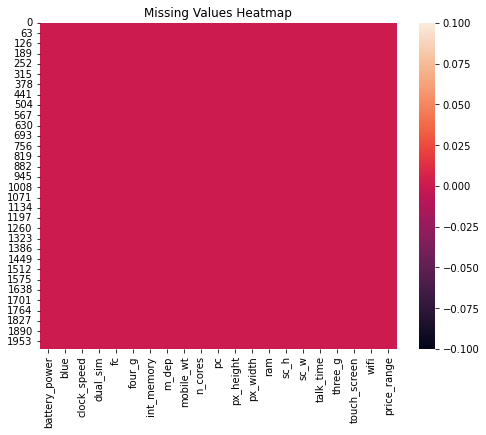

In [11]:
# Visualizing the missing values
plt.figure(figsize=(8, 6)) #size of the figure
sns.heatmap(dataset.isnull())
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

This is a dataset containing features of different mobile phones and their price ranges. It has 21 columns and 2000 rows. The dataset does not have any null values or duplicate values.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
# Looking at the column names
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
# Dataset Describe
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

**Battery_power** : Battery capacity in mAh

**Blue** : Has bluetooth or not

**Clock_speed** : speed at which microprocessor executes instructions

**Dual_sim** : Has dual sim support or not

**Fc** : Front Camera megapixels

**Four_g** : Has 4G or not

**int_memory** : internal memory capacity

**M_dep**: Mobile depth in cm

**MObile_wt**: Weight of mobiles phone

**N_cores**: Number of cores in processor

**Pc** : Primary Camera mega pixels

**Px height** : Pixel resolution height

**Px width**: Pixel resolution width

**Ram**: Random Access Memory in MB

**sc_h**: Screen Height

**sc_w**: Screen width

**Talk time** : Longest that a single battery can last
overa call

**Three_g**: Has 3g or not

**wifi** : Has wifi or not

**touch_screen** : Has touch screen or not

**Price_range** : This is the target variable with a value of 0(low cost) 1(medium cost), 2 (high cost),3(very high cost)




### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df=dataset.copy()

In [16]:
df['price_range'].value_counts() # looking at the count of different values in the dependent variable

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [17]:
df.groupby('price_range')['ram'].mean() # Checking mean ram value based on price range

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

In [18]:
df.groupby('price_range')['battery_power'].mean() # mean battery power based on price range

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

In [19]:
print(df['three_g'].value_counts()) # number of 4G and 3G phone counts
print(df['four_g'].value_counts())

1    1523
0     477
Name: three_g, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64


In [20]:
len(df[(df['three_g'] == 1) & (df['four_g'] == 1)]) # How many phones have both 3G and 4G

1043

In [21]:
len(df[df['blue']==1])
len(df['blue'])
pct=(len(df[df['blue']==1])/len(df['blue']))*100 # percentage of phones that have bluetooth
pct

49.5

In [22]:
# pixel height and width based on price range
print(df.groupby('price_range')['px_height'].mean())
print(df.groupby('price_range')['px_width'].mean())



price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64
price_range
0    1150.270
1    1251.908
2    1234.046
3    1369.838
Name: px_width, dtype: float64


In [23]:
# Number of phones with and without touchscreen
print(len(df[df['touch_screen']==1])) 
print(len(df[df['touch_screen']==0]))

1006
994


In [24]:
# Average talktime for phones with and without 3G
print(df[df['three_g'] == 1]['talk_time'].mean())
print(df[df['three_g'] == 0]['talk_time'].mean())

10.880499015101773
11.427672955974844


In [25]:
df.groupby('n_cores')['ram'].mean() # mean ram value based on number of cores

n_cores
1    2153.202479
2    2089.639676
3    2082.808943
4    2090.569343
5    2210.739837
6    2110.847826
7    2155.370656
8    2103.300781
Name: ram, dtype: float64

In [26]:
# Average internal memory for phonees witha dn without 4G
print(df[df['four_g'] == 1]['int_memory'].mean())
print(df[df['four_g'] == 0]['int_memory'].mean())

32.19750719079578
31.88192267502612


In [27]:
# Number of phones with dual sim
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [28]:
# Primary camera megapixels based on price range
df.groupby('price_range')['pc'].mean()

price_range
0     9.574
1     9.924
2    10.018
3    10.150
Name: pc, dtype: float64

### What all manipulations have you done and insights you found?

The insights I have found are:



1. Low cost, medium cost, high cost and very high cost, all have equal number of observations in the data (500 each).

2. As the price range increase, the average amount of ram increases.

3. As the price range increase, the average battery power of ram increases.

4. More number of phones support 3G as compared to 4g.

5. More than half of the phones have both 3G and 4G.

6. 49.5 percent of the phones in this dataset have bluetooth.

7. The pixel height and the width increases as the phones get costlier.

8. In the dataset, thers is almost equal number of phones with and without touchscreen.

9. The average talktime is sligtly more on a phone with 4g.

10. Phones with 5 cores have the highest average ram amount.

11. As the camera mega pixel increases, the price range also increases.

12. Most of the phones have dual sim.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar plot of price range 

Text(0.5, 1.0, 'Mobile Phone Price Range Distribution')

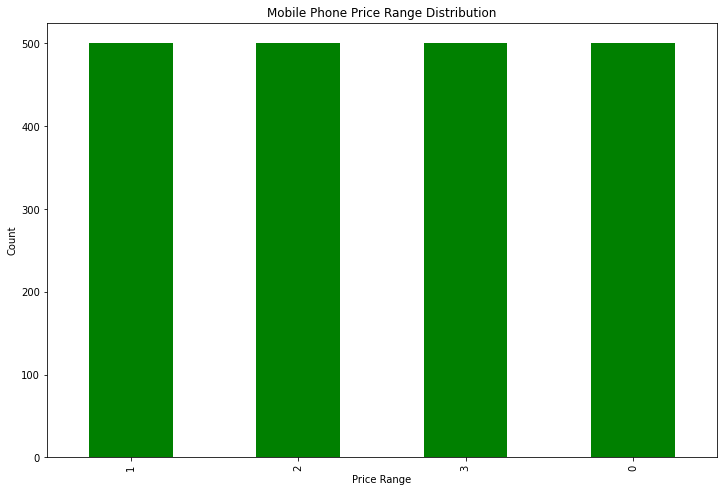

In [29]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 8)) # plot size
df['price_range'].value_counts().plot.bar(color='green') #plot type
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Mobile Phone Price Range Distribution')

##### 1. Why did you pick the specific chart?

I used a bar chart since it is easy to visualize the counts of categorical variables, where the hight of the rectangular bars are proportional to the amount on the Y axis. It can easily be used to visualize which category has more frequency in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From this chart I can see that all the price ranges have equal number of observations in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this particular plot, I cannot make any business decision, I can only use it to understand how the count of the variables.

#### Chart - 2 Histogram of battery power 

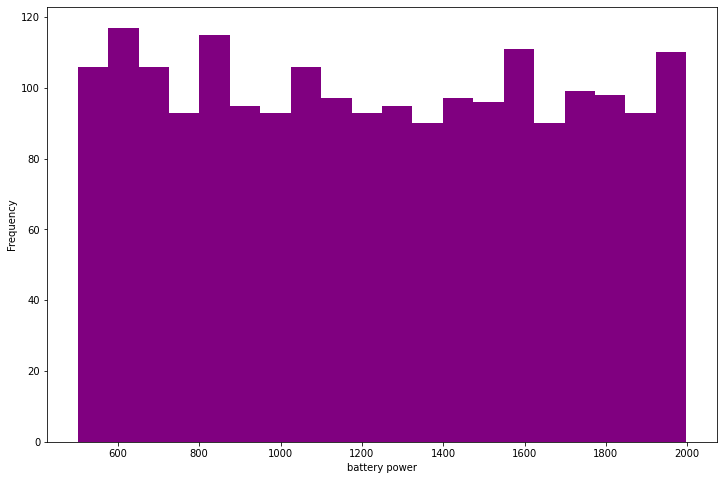

In [30]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 8)) # plot size
plt.hist(df['battery_power'],bins=20,color='purple') #plot type
plt.xlabel('battery power')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows us the count of values that lie in different ranges. It is used to represent numerical data and is commonly used for performing univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that the frequency of having a battery power of 600-650 is the highest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through this insight, phone companies can make sure that their phones who fall in the 600-650 battery capacity range, are availible easily, as it seems that that is what most people prefer to buy, and also try and make more number of phones in that battery capacity range.

#### Chart - 3 Pie chart of the percentage count of number of cores 

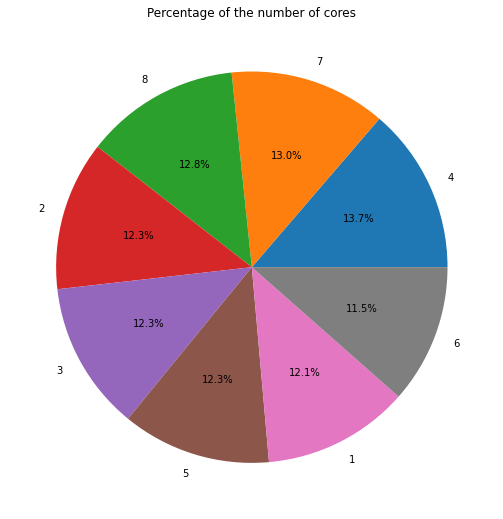

In [31]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 9)) #plot size
q=df['n_cores'].value_counts()
plt.pie(q.values, labels=q.index, autopct='%1.1f%%') #plot type
plt.title('Percentage of the number of cores')
plt.show()

##### 1. Why did you pick the specific chart?

I used a pie chart for this visualization to clearly show the percentage of the number of cores in mobile phones.

A pie chart is a very simple visualization and easy to understand since different variables are represented using sectors that have different colours.

##### 2. What is/are the insight(s) found from the chart?

From this,  I can clearly see that phones with 4 cores have a higher count than phones with other cores and phones with 6 cores have the least count in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this insight, phone companies can try to make phones with 8 cores, since thats what people would prefer.

#### Chart - 4 Donut chart of 4G support in Mobile phones.

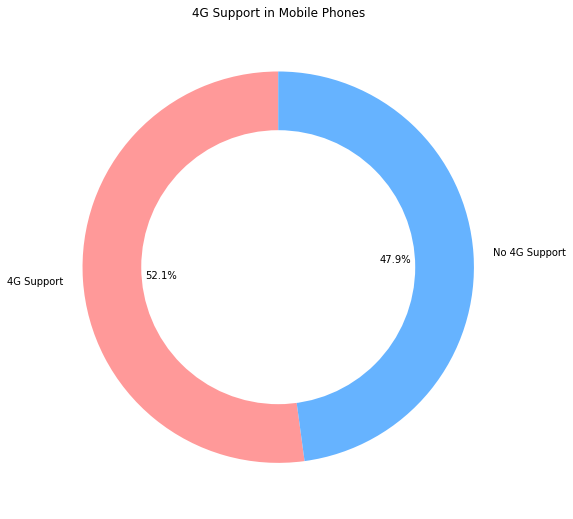

In [32]:
# Chart - 5 visualization code

four_g_count = df.four_g.value_counts()
labels = ['4G Support', 'No 4G Support']
sizes = [four_g_count[1], four_g_count[0]]
colors = ['#ff9999','#66b3ff']
fig, ax = plt.subplots(figsize=(12, 9))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90) #plot type
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)


plt.title('4G Support in Mobile Phones')
plt.show() 







##### 1. Why did you pick the specific chart?

A Donut chart is essentially a Pie Chart with an area of the center cut out. I have used it to visualize the percentage of phones that have 4g support.

##### 2. What is/are the insight(s) found from the chart?

I can see that most of the phones have 4g support.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mobile phone companies should make sure that their phones have 4G support to keep them competitive in the market, as most phones already seem to support 4G.

#### Chart - 5 Scatterplot of ram and price range 

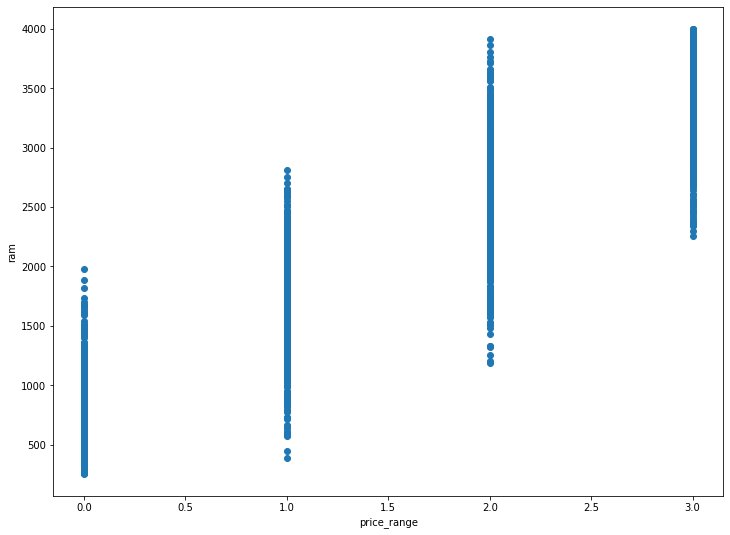

In [33]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 9)) #plot size
plt.scatter(df['price_range'],df['ram']) #plot type
plt.xlabel('price_range')
plt.ylabel('ram')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatterplot which is commonly used to represent bivariate data.Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related. 

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that the ram amount increases, the prices get higher as well.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Throught this insight, companies can try making phones with high amount of ram, and lowering the price. This could help them get ahead of their competition, since most of them increase the price of the phone as they increase the ram.

#### Chart - 6 Box plot of price range and 4G

<AxesSubplot:xlabel='four_g', ylabel='price_range'>

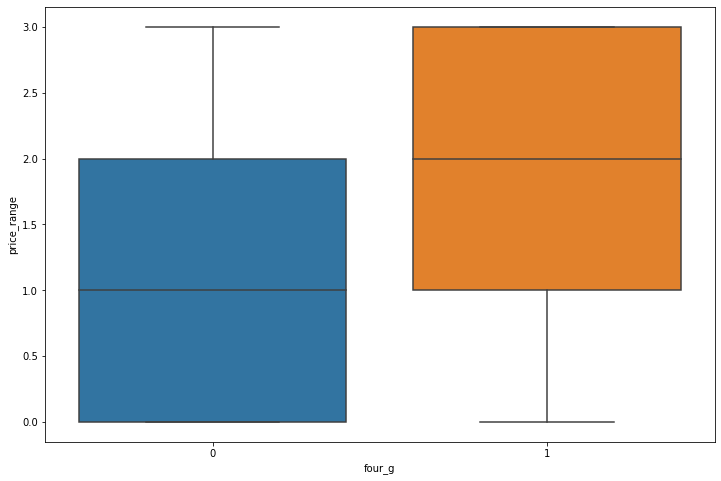

In [34]:
# Chart - 6 visualization code
plt.figure(figsize=(12,8)) # plot size
sns.boxplot(x = 'four_g', y = 'price_range', data = df) #plot type

##### 1. Why did you pick the specific chart?

I used a box plot to visualize the distribution of the data , I can also see the median value of phone that have 4g and do not have 4g. This kind of plot can also be use to look for outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

From this plot it is pretty clear the median price of phones with 4G support is higher than the median price of phones without 4G support. This shows that 4G phones are priced higher than non 4G phones.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through this insight, it is clear that people are ready to pay more to purchase phones that support 4g, the phone companies can try and decrease the price of the 4G phones which would draw more people into buying the product since they will be getting a 4G phone for a cheaper price.

#### Chart - 7 Box plot of phones with bluetooth and price range.

<Figure size 864x576 with 0 Axes>

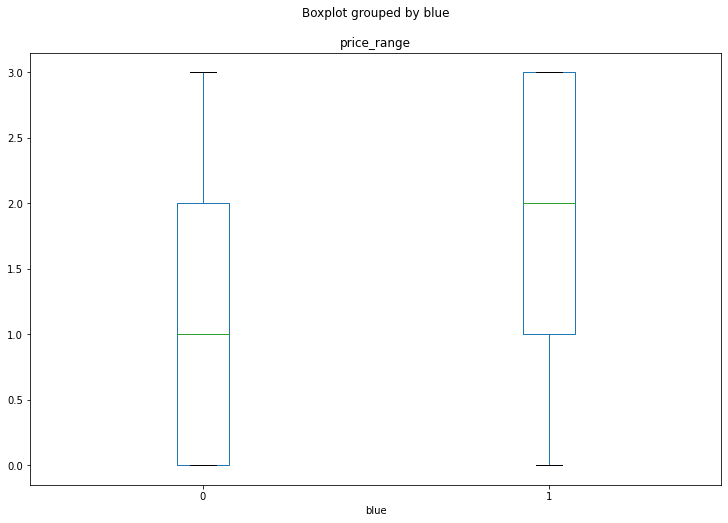

In [35]:
# Chart - 7 visualization code
plt.figure(figsize=(12,8)) #plot size
df.boxplot(column='price_range', by='blue', figsize=(12,8),grid=False) #plot type
plt.show()

##### 1. Why did you pick the specific chart?

I used a boxplot since it can be used to visualize the distribution across different categories, and the median value can be easily visualized as well.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that the median price of phones with bluetooth is higher than the median price of phones without the bluetooth feature.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using this insight, It is clear that people are willing to pay more for phones with bluetooth, so companies should make sure that they have the bluetooth feature in their phone even if it means increasing the prices.

#### Chart - 8 Count plot of phones by price range and bluetooth support

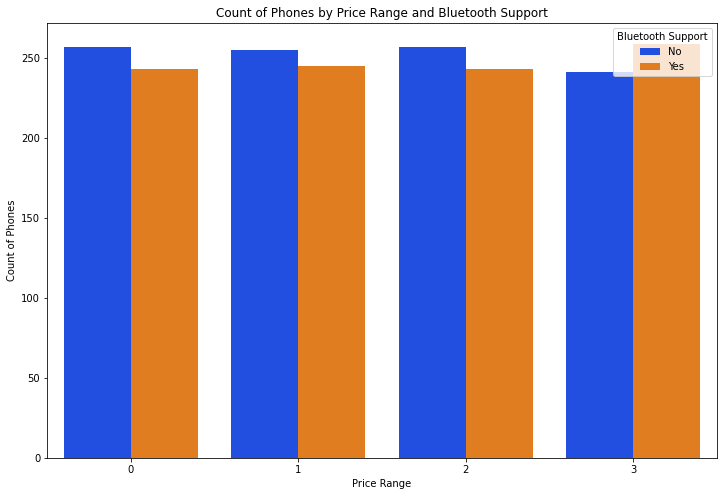

In [36]:
# Chart - 8 visualization code
plt.figure(figsize=(12,8)) #plot size
sns.countplot(x='price_range', hue='blue', data=df, palette='bright') #plot type
plt.xlabel("Price Range")
plt.ylabel("Count of Phones")
plt.title("Count of Phones by Price Range and Bluetooth Support")
plt.legend(title="Bluetooth Support", labels=["No", "Yes"])
plt.show()


##### 1. Why did you pick the specific chart?

I used a countplot as the countplot is used to represent the occurrence(counts) of the observation present in the categorical variable. It is very similar to barplot.



##### 2. What is/are the insight(s) found from the chart?

From the chart, I can see that most of the phones which are at a higher price range have bluetooth support.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Phone companies should make sure that their phones have bluetooth support, especially if they are pricing their phones in a higher price range, since most higher end phones support that functionality.

#### Chart - 9 Bar plot of number of core vs average clock speed

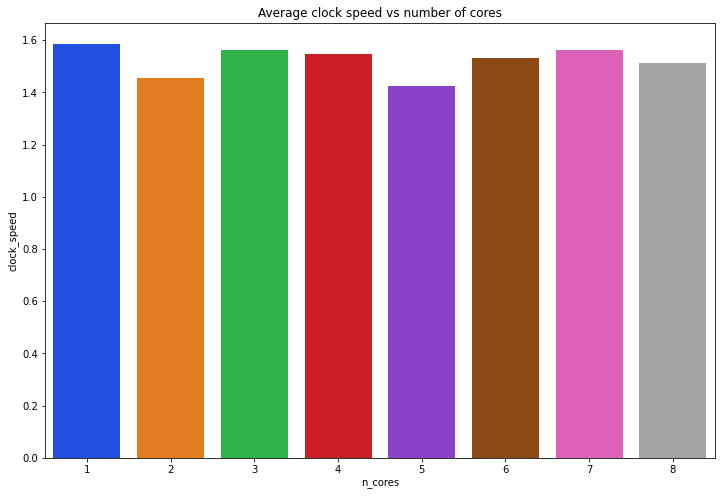

In [37]:
# Chart - 9 visualization code
plt.figure(figsize=(12,8)) #plot size
q=df.groupby('n_cores')['clock_speed'].mean().reset_index() 
sns.set_palette("bright")
sns.barplot(x =q['n_cores'], y=q['clock_speed']) # plot type
plt.title('Average clock speed vs number of cores')
plt.show()

##### 1. Why did you pick the specific chart?

I used a barchart as it is good to represent categorical data, and easy to interpret. In a barchart the height of the rectangular boxes are proportional to the amount on the y axis.

##### 2. What is/are the insight(s) found from the chart?

I can see that phones with 1 core have the highest average clock speed and phones with 5 cores have the lowest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Companies can use this information and create more phones with a single core, if they want to increase their clock speed.

#### Chart - 10 Scatterplot of pixel height and width

Text(0, 0.5, 'pixel width')

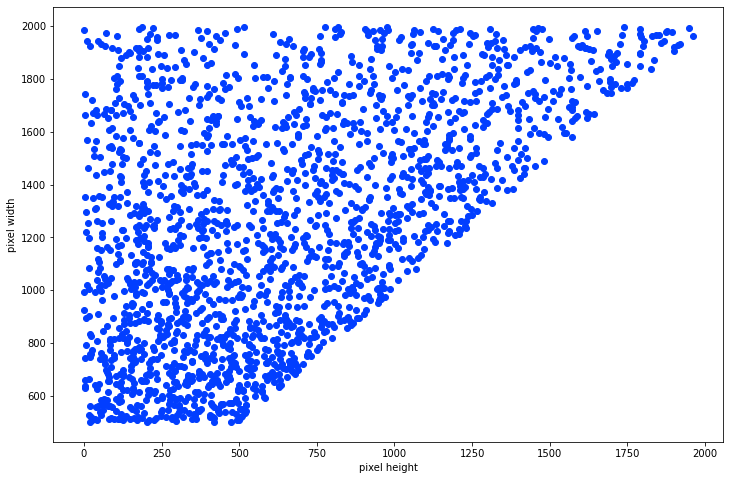

In [38]:
# Chart - 10 visualization code
plt.figure(figsize=(12,8)) #plot size
plt.scatter(df['px_height'],df['px_width']) #plot type
plt.xlabel('pixel height')
plt.ylabel('pixel width')


##### 1. Why did you pick the specific chart?

I chose a scatterplot to visualize this info since it is commonly used to represent bivariate data. Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related. 

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that there is a relationship between the height and width of pixels, as the width increases, so does the height.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help the business see that these 2 variables are correlated and certain transformations can be done to merge these 2 variables into a single variable.

#### Chart - 11 Barplot of pc and price_range

<AxesSubplot:xlabel='price_range', ylabel='pc'>

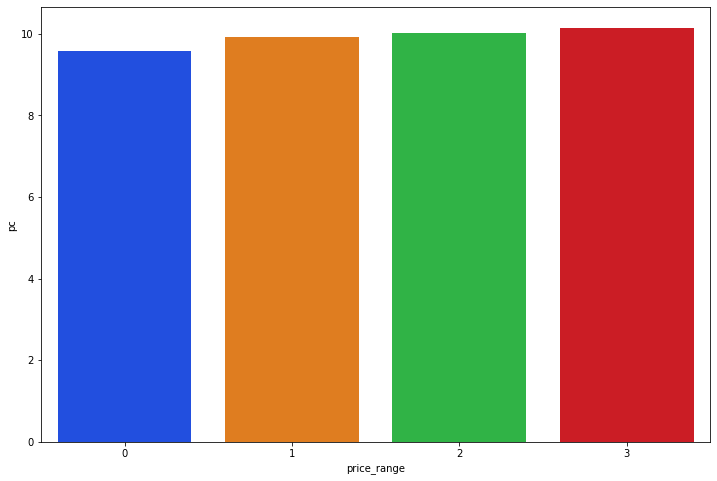

In [39]:
# Chart - 11 visualization code
plt.figure(figsize=(12,8)) #plot size
q=df.groupby('price_range')['pc'].mean().reset_index()
sns.barplot(x =q['price_range'], y=q['pc']) #plot type


##### 1. Why did you pick the specific chart?

I used a barchart as it is good to represent categorical data, and easy to interpret. In a barchart the height of the rectangular boxes are proportional to the amount on the y axis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can clearly see that costlier phones have cameras with higher megapixels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Phone companies who are planning to make higher end phones should make sure that their camera megapixels are higher than the camera meagapixels of the lower end phones.

#### Chart - 12 - Correlation Heatmap

<AxesSubplot:>

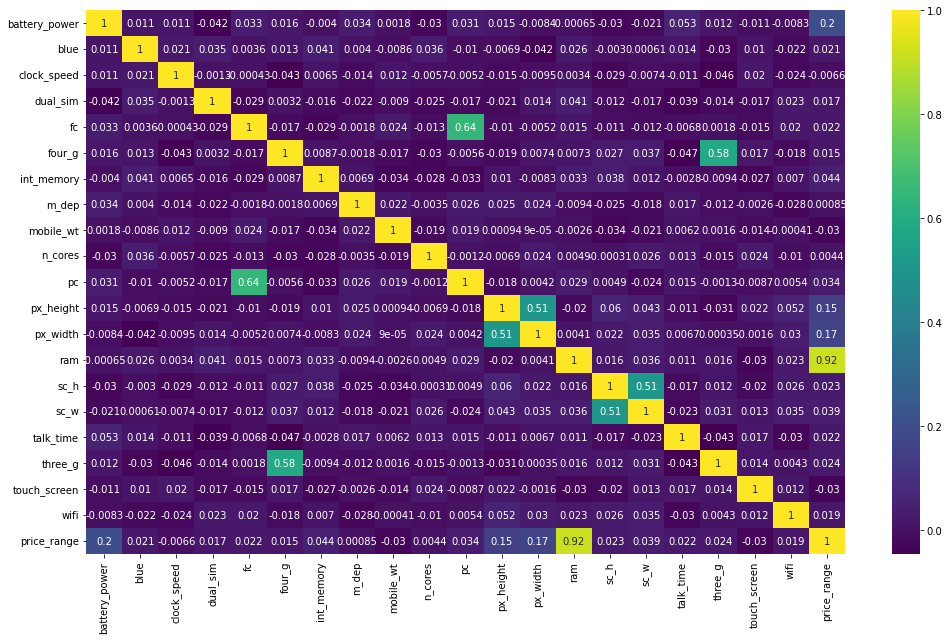

In [40]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10)) #plot size
sns.heatmap(df.corr(),annot=True,cmap='viridis') #plot type

##### 1. Why did you pick the specific chart?

I used a correlation heatmap to visualize the correlations between the variables and to find out if there are any significant positive or negative relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

There aren't too many correlations in the variables, but few insights I can see are:

1. Slight positive correlation between battery power and price range.

2. High positive correlation between pc and fc

3. High positive correlation between three_g and four_g

4. High positive correlation between px height and px width

5. High positive correlation between ram and price_range.



The other remaining correlations can easily be seen in the above plot.

#### Chart - 13 - Pair Plot 

In [41]:
# Pair Plot visualization code
#sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pairplot shows you multiple bivariate distributions. It basically shows us the graphs of each bivariate distributions unlike a correlation heatmap which shows us only the values. We can look at each of these plots to check if there are any correlations.

##### 2. What is/are the insight(s) found from the chart?

The insights from this chart are pretty much similar to the insights obtained using the correlation heatmap, the same correlations we found using the heatmap can be visualized above in the pairplot. There aren't too many variables with high correlations in this dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average battery power is 1500.

2. The average mobile weight is 150.

3. The average amount of ram is 2000.

### Hypothetical Statement - 1
The average battery power is 1500



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=1600

Alternate Hypothesis: mean !=1600

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
x_bar = df['battery_power'].mean() #mean
mu = 1600
population_sd= df['battery_power'].std()
n=len('battery_power')

t=(x_bar - mu)/(population_sd/math.sqrt(n)) 

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) #calculation of p value
p_value


0.011787203946765468

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have rejected the null hypothesis as the p value is less than 0.05

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of the battery power is significantly different from a known population mean.

### Hypothetical Statement - 2 
The average mobile weight is 150.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=160

Alternate Hypothesis: mean !=160

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value
x_bar = df['mobile_wt'].mean()
mu = 160
population_sd= df['mobile_wt'].std()
n=len('mobile_wt')

t=(x_bar - mu)/(population_sd/math.sqrt(n))

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) # p value calculation
p_value

0.1326989584264766

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have failed to reject the null hypothesis as the p value is more than 0.05.

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of the battery weight is significantly different from a known population mean.

### Hypothetical Statement - 3

The average amount of ram is 2000.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=1000

Alternate Hypothesis: mean !=1000

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
x_bar = df['ram'].mean()
mu = 1000
population_sd= df['ram'].std()
n=len('ram')

t=(x_bar - mu)/(population_sd/math.sqrt(n))

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) # p value calculation
p_value

0.21448673559562326

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have failed to reject the null hypothesis as the p value is more than 0.05. 

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of the ram is significantly different from a known population mean.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum().sum() # looking for number of missing values in the data

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in this dataset, therefore I did not use any techniques.

### 2. Handling Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

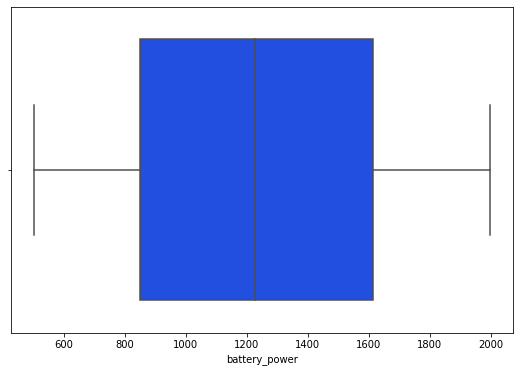

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

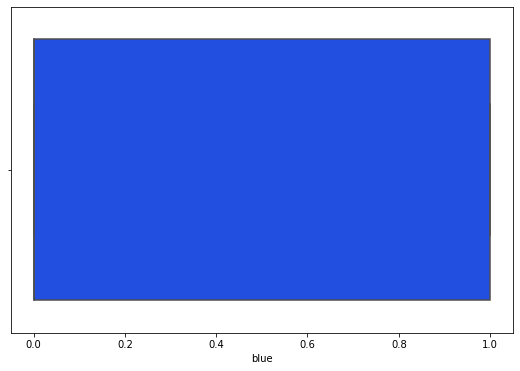

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

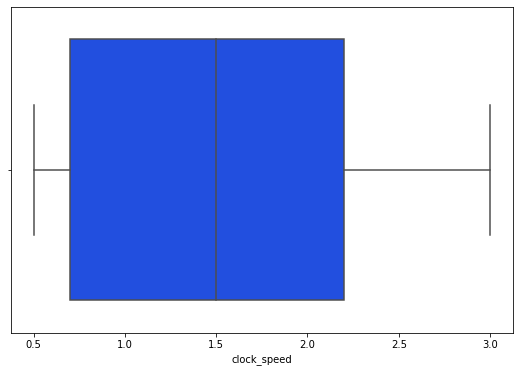

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

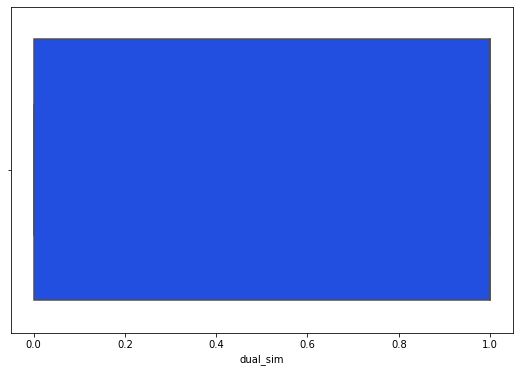

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

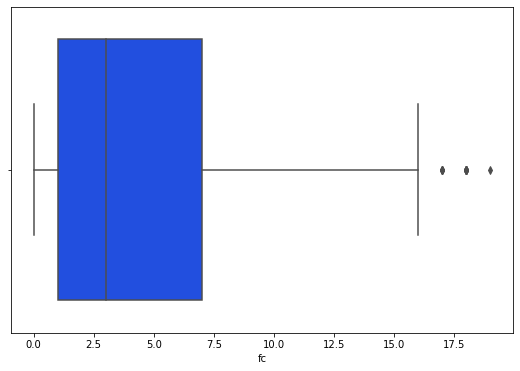

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

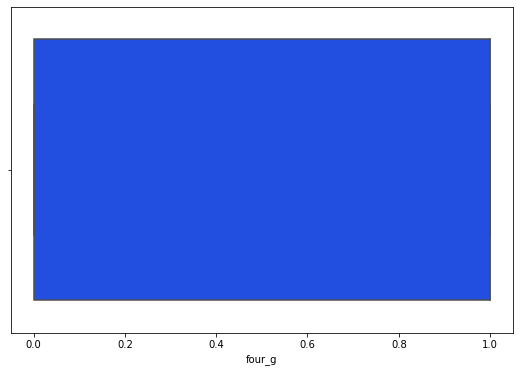

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

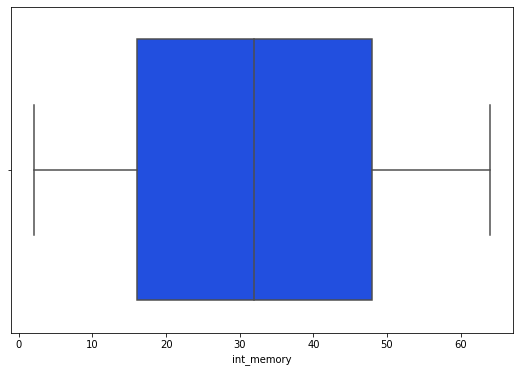

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

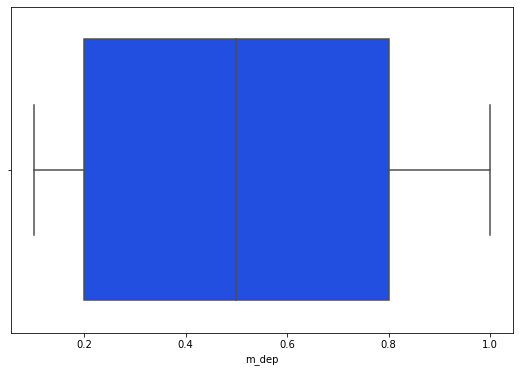

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

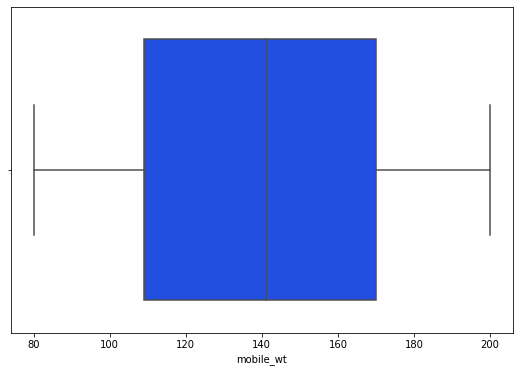

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

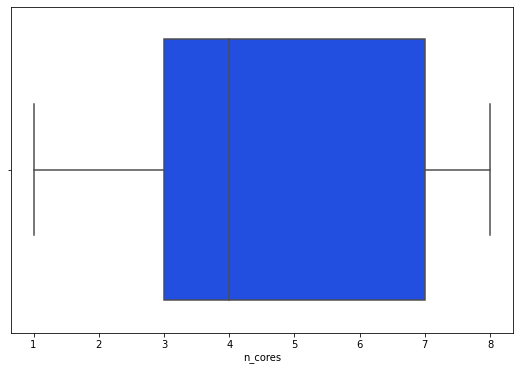

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

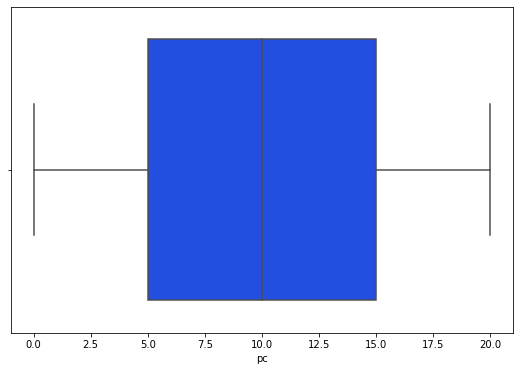

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

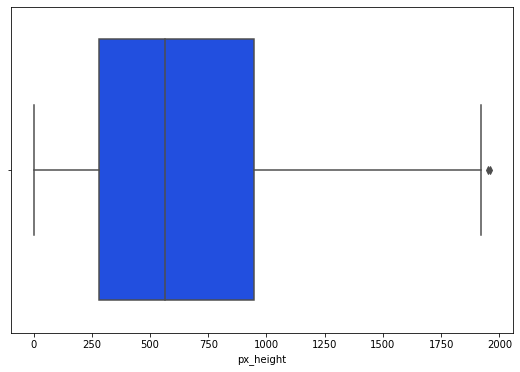

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

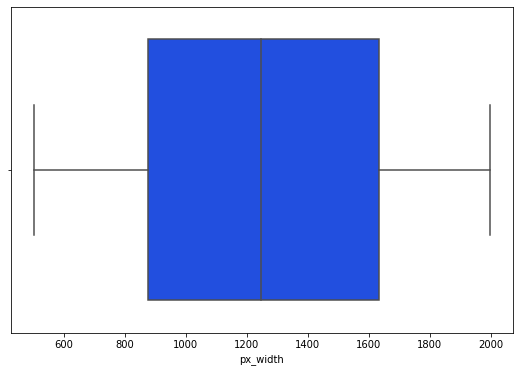

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

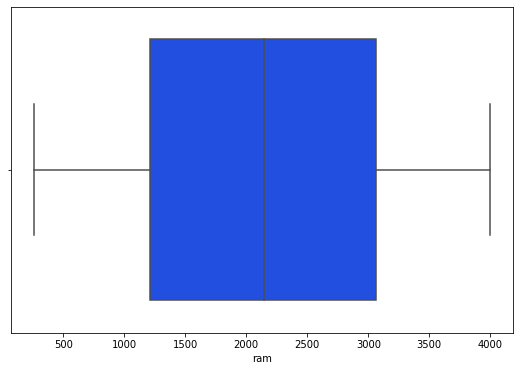

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

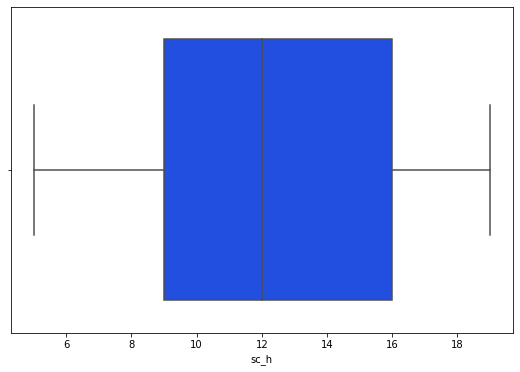

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

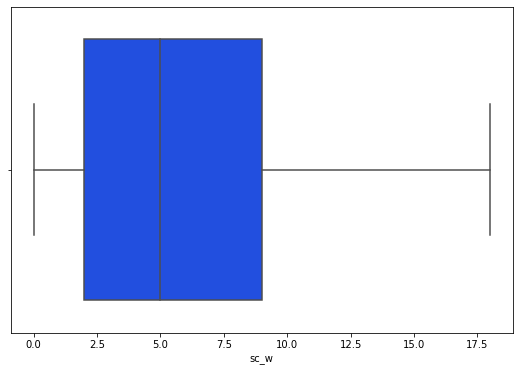

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

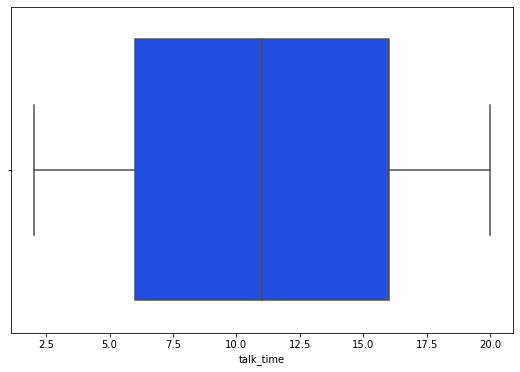

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

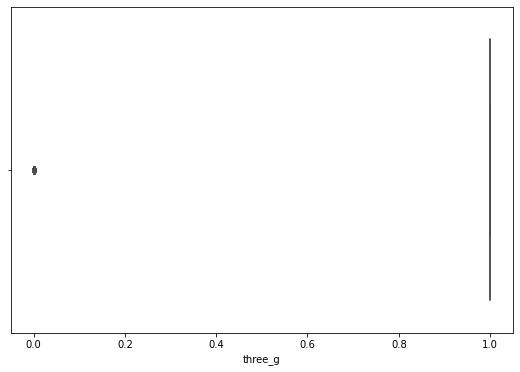

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

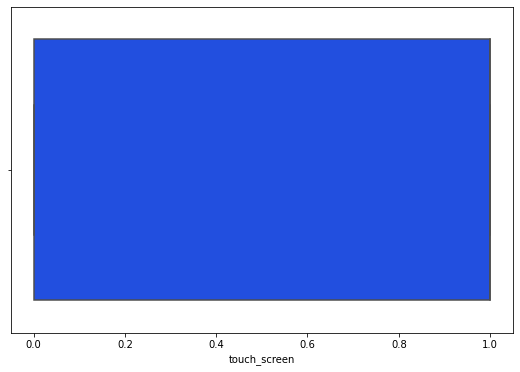

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

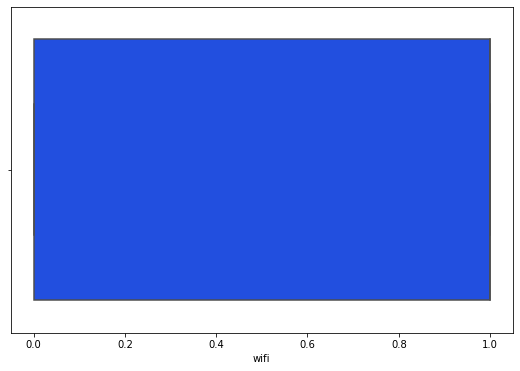

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

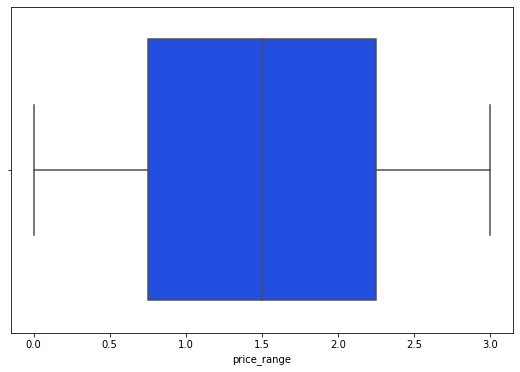

In [46]:
# Handling Outliers & Outlier treatments
numerical=df.describe().columns.values
for i in numerical:
  plt.figure() # plots figure for each iteration
  plt.figure(figsize=(9,6))  
  sns.boxplot(df[i]) #plot type
  plt.show()

there are outliers in fc and px height

In [47]:
#Removing outliers from fc using IQR
Q1 = np.percentile(df['fc'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df['fc'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(df['fc'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['fc'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

<ipython-input-47-8aeaf7bc5766>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['fc'], 25,
<ipython-input-47-8aeaf7bc5766>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['fc'], 75,


In [48]:
#Removing outliers from px_height using IQR
Q1 = np.percentile(df['px_height'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df['px_height'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(df['px_height'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['px_height'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

<ipython-input-48-5e74eb0050d8>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['px_height'], 25,
<ipython-input-48-5e74eb0050d8>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['px_height'], 75,


##### What all outlier treatment techniques have you used and why did you use those techniques?

There weare only a few outliers. I used IQR (inter quartile range) to drop the rows which had outliers in the dataset. IQR is used to measure variability by dividing a data set into quartiles. This approach is very commonly used for outlier removal and is a very trusted method . I have dropped the values that are above the upper bound and below the lower bound measurements.

### 3. Categorical Encoding

In [49]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding is not required in this particular dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [50]:
# Manipulate Features to minimize feature correlation and create new features
# multiplying px_height and px_width to get px_area
df['px_area']=df['px_width']*df['px_height']

In [51]:
#dropping px_height and px_width
df.drop('px_height',axis=1,inplace=True)
df.drop('px_width',axis=1,inplace=True)

In [52]:
# Multiplying columns sc_h and sc_w to get sc_area
df['sc_area']=df['sc_w']*df['sc_h']

In [53]:
#dropping sc_h and sc_w
df.drop('sc_h',axis=1,inplace=True)
df.drop('sc_w',axis=1,inplace=True)


In [55]:
X=df.drop('price_range',axis=1)
  
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [56]:
print(vif_data)

          feature        VIF
0   battery_power   7.888048
1            blue   1.981610
2     clock_speed   4.200653
3        dual_sim   1.996745
4              fc   3.359676
5          four_g   3.187521
6      int_memory   3.899301
7           m_dep   3.881258
8       mobile_wt  12.094100
9         n_cores   4.561530
10             pc   5.895167
11            ram   4.644658
12      talk_time   4.777451
13        three_g   6.111906
14   touch_screen   1.987558
15           wifi   1.987864
16        px_area   2.168506
17        sc_area   2.089387


In [57]:
X=df.drop(['price_range','mobile_wt'],axis=1) # dropping the dependent variable and unnecessary variable
  
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [58]:
print(vif_data)

          feature       VIF
0   battery_power  7.472227
1            blue  1.976321
2     clock_speed  4.066737
3        dual_sim  1.973756
4              fc  3.358165
5          four_g  3.186818
6      int_memory  3.837915
7           m_dep  3.786000
8         n_cores  4.451917
9              pc  5.840591
10            ram  4.555019
11      talk_time  4.629171
12        three_g  5.986670
13   touch_screen  1.978478
14           wifi  1.973050
15        px_area  2.155231
16        sc_area  2.083462


After dropping mobile_wt, the VIF values are all below 10.

#### 2. Feature Selection

In [59]:
# Select your features wisely to avoid overfitting
X=df.drop(['price_range','mobile_wt'],axis=1)

In [60]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'n_cores', 'pc', 'ram', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'px_area', 'sc_area'],
      dtype='object')

##### What all feature selection methods have you used  and why?

I used VIF( Variance inflation Factor) to decide the features to select. It tells us the strength of correlation among the independent variables. Its better to have variables that do not have high correlations. I dropped the column mobile_wt since it had a high VIF value. I also created the columns px_area and sc_area using the columns px_height, px_width, sc_h and sc_w.

##### Which all features you found important and why?

The features I found important are 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'n_cores', 'pc', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'px_area', 'sc_area'. A simpler model is preferable, and, in some sense, a model with fewer features is simpler.
These features do not have high correlations with each other, with VIF values below 10 for all.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?



I think that transformation of the dependent variable is not required in this case since the algorithms I will be using are non parametric algorithms. Non-parametric classification algorithms do not make any assumptions about the underlying distribution of the data, while parametric classification algorithms assume that the data follows a specific distribution.

In [61]:
# Transform Your data


### 6. Data Scaling

In [62]:
# Scaling your data
#Using minmax scaler to scale the data
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)


##### Which method have you used to scale you data and why?
Scaling of the data makes it easy for a model to learn and understand the problem.
I used Min Max scaler to scale my data.
The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively, so all the variables have values between 0 to 1.
If scaling is not done, the feature with a higher value range might start dominating over the features with lower values.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No , in this case, I feel that dimensionality reduction is not needed. Dimensionality reduction is used when there are too many features in a dataset. In this case, I have not used it since the number of features are not that high. The dataset I have is not complex and it only has 21 columns in the whole dataset.

One disadvantage of dimensionality reduction is that some data may be lost due to it.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.
y=df['price_range']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state = 0)  #Splitting

##### What data splitting ratio have you used and why? 

The ratio I have used is 80:20. Which means that 80% of the data is used for training and 20% of the data is used for testing. This is the most commonly used ratio for splitting the data. There does not seem to be a clear rule on what ratio is best or optimal for a given dataset, but using an 80:20 split is said to be a good bet.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.



No, the dataset I have is not imbalanced. Data imbalance usually reflects an unequal distribution of classes within a dataset i.e, one class label has a very high number of observations and the other has a very low number of observations. The number of observations I have for each class is pretty much the same, therefore, it is not an imbalanced dataset. 

If there was an imbalance, I would have to use undersampling or oversampling techniques.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1- Decision Tree

In [65]:
# ML Model - 1 Implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, auc
clf = DecisionTreeClassifier(random_state=0)

# Fit the Algorithm
clf.fit(X_train, y_train)

# Predict on the model
y_pred = clf.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model I used is Decision Tree. It is a non-parametric supervised learning algorithm. With a  hierarchical, tree like structure. 

The splitting is done in a way to maximize the information gain or minimize the impurity of the subsets. The final model is a tree structure, where each internal node represents a split based on a feature and each leaf node represents a class label or a regression output. 

It can be prone to overfitting.

In [66]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        90
           1       0.83      0.75      0.79       102
           2       0.70      0.82      0.75        97
           3       0.89      0.81      0.85       103

    accuracy                           0.82       392
   macro avg       0.83      0.82      0.82       392
weighted avg       0.83      0.82      0.82       392



#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
parameters={'max_depth': [2, 4, 6, 8,10,12,14,16,18,20],'min_samples_split': [2, 4, 6, 8,10,12,14,16,18,20],'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4,5,6,7,8,9,10]}
gs= GridSearchCV(clf,parameters, cv=5)
# Fit the Algorithm
gs.fit(X_train,y_train)
# Predict on the model
y_predDTCV= gs.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. I used it since it searches for the best set of hyperparameters from a grid of hyperparameters values and uses the optimal hyperparameter value.

Techniques such as GridSearch help us get the most optimal hyperparameter value, as opposed to manually entering and trying many different hyperparameter values using trial and error method. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [68]:

print(classification_report(y_test, y_predDTCV))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        90
           1       0.83      0.81      0.82       102
           2       0.78      0.85      0.81        97
           3       0.95      0.85      0.90       103

    accuracy                           0.86       392
   macro avg       0.86      0.86      0.86       392
weighted avg       0.86      0.86      0.86       392



Yes, I have seen an improvement in the accuracy of the model after performing grid search cross validation. Initially, my accuracy score was just 0.82, and now it is 0.86

### ML Model - 2- Random Forest 

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# ML Model -  Implementation
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# Fit the Algorithm
clf.fit(X_train,y_train)
# Predict on the model
y_predrf=clf.predict(X_test)

In [70]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        90
           1       0.82      0.82      0.82       102
           2       0.83      0.86      0.84        97
           3       0.97      0.91      0.94       103

    accuracy                           0.88       392
   macro avg       0.88      0.88      0.88       392
weighted avg       0.88      0.88      0.88       392



Here, the ML model I used is Random Forest. It is an ensemble learning method which builds multiple decision trees on different random subsets of the training data and features.

Each tree in the forest is built using a different subset of the training data and a different subset of the features. The final output of the model is determined by aggregating the predictions of all the trees in the forest. 

It can reduce overfitting as well.

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'n_estimators':[20,50, 80,100,110], 'max_depth':[3, 5, 7]}
gs= GridSearchCV(clf, parameters, cv=5)
# Fit the Algorithm
gs.fit(X_train,y_train)
# Predict on the model
ypredRFCV=gs.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. I used it since it searches for the best set of hyperparameters from a grid of hyperparameters values and uses the optimal hyperparameter value.

Techniques such as GridSearch help us get the most optimal hyperparameter value, as opposed to manually entering and trying many different hyperparameter values using trial and error method. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [72]:
print(classification_report(y_test, ypredRFCV))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        90
           1       0.86      0.78      0.82       102
           2       0.84      0.87      0.85        97
           3       0.96      0.92      0.94       103

    accuracy                           0.88       392
   macro avg       0.88      0.88      0.88       392
weighted avg       0.88      0.88      0.88       392



Yes, I have seen an improvement. Initially, I had an accuracy score of just 0.88, but after hyperparameter tuning, I achieved an accuracy of 0.89. Also, my precision, recall and f1 score improved as well.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Precision:** Precision is defined as the ratio of correctly classified positive samples to a total number of classified positive samples.

**Recall:** The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. 

**f1-score:** It combines both precision and recall.

**Accuracy:** It is the number of correct predictions divided by the total number of prediction. It may not be the best metric in all scenarios, especially if the classes are imbalanced. 


The choice of evaluation metrics should be based on the specific business problem and the costs associated with misclassification. Therefore, it is important to understand the business impact of the ML model and choose appropriate evaluation metrics accordingly.





### ML Model - 3- XGBoost

In [73]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
clf = XGBClassifier()
# Fit the Algorithm
clf.fit(X_train,y_train)
# Predict on the model
y_predxg=clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_predxg))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        90
           1       0.91      0.89      0.90       102
           2       0.86      0.91      0.88        97
           3       0.95      0.90      0.93       103

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



  The ML model I used in known as XGBoost. It is a type of gradient boosting algorithm that uses an ensemble of decision trees to make predictions. The algorithm works by iteratively training a sequence of decision trees, where each subsequent tree is trained to correct the errors of the previous one.

The performance has been good, giving us an accuracy, precision, recall and f1 score of 0.91.

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'learning_rate':[0.1,0.5,1,0.05], 'max_depth':[3, 5, 7],'gamma':[0,0.5,0.7],'subsample': [0.1, 0.3, 0.5]}
gs= GridSearchCV(clf, parameters, cv=5)
# Fit the Algorithm
gs.fit(X_train,y_train)
# Predict on the model
ypredXGCV=gs.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. I used it since it searches for the best set of hyperparameters from a grid of hyperparameters values and uses the optimal hyperparameter value.

Techniques such as GridSearch help us get the most optimal hyperparameter value, as opposed to manually entering and trying many different hyperparameter values using trial and error method. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [133]:
print(classification_report(y_test, ypredXGCV))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        90
           1       0.88      0.89      0.89       102
           2       0.88      0.89      0.88        97
           3       0.96      0.92      0.94       103

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



There has not been much improvement even after performing. The precision for class '1' has decreased, wherease there has been an increase in precision for classes 2 and 3. 

The recall for class '3' has improved , whereas it has decreased for class '2'. 

The f1 score for class 3 has improved, but the f1 score for class '1' has decreased.

The accuracy of the model has remained same.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this particular problem, I would choose accuracy as the most important metric for a positive business impact. The reason for this is that in this scenario, the cost of misclassification of a phone's price range is generally equal for all price ranges, and the classes are not imbalanced. Accuracy score should be used over precision and recall when the classes in the dataset are balanced, meaning that the number of instances in each class is roughly equal. In such cases, accuracy provides a simple and intuitive measure of the model's overall performance in correctly classifying instances. The higher the accuracy score, the better the model is at predicting the correct class.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose the XGBoost model as my final prediction model since it give me the best score out of all the other models, in terms of the evaluation metrics that I chose.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Using SHAP for model explainablility:**

In [78]:
#SHAP
!pip install SHAP
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.0 MB/s eta 0:00:00


In [111]:
shap.initjs()
X_shap=X_test
explainer=shap.TreeExplainer(clf)
shap_values=explainer.shap_values(X_shap)

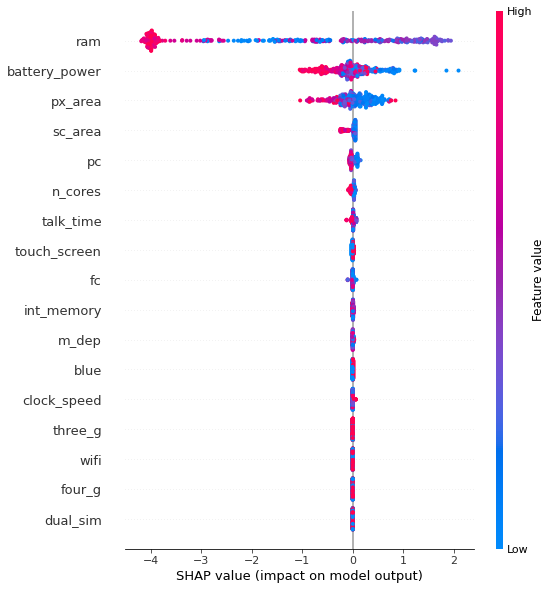

In [115]:
# Summary plot
Xs=df.drop(['price_range','mobile_wt'],axis=1)
shap.summary_plot(shap_values[1],X_shap,plot_type='dot',feature_names=list(Xs.columns))


The model I have used is an XGboost model. 

Here, I have used a summary plot. The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high.

In this figure, the red dots are those observations for which the variable is taking a high value and the blue dots are those observations for which the variable is taking a low value. You can see that the feature dual_sim, being the least important feature, has low Shapley values, and ram is the most important feature with high shap values. The color represents the value of the feature from low to high.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. The dataset had no class imbalance.

2. Frequency of having batttery power between 600-650 is the highest.

3. Phones with 4 cores have the highest count.

4. Most phones have 4G support.

5. Price range increases with increase in ram.

6. Median price of phones with bluetooth is higher than median price of phones withouut bluetooth.

7. Linear relationship between height and width of pixels, same with screen height and width.

8. Costlier phones have better cameras

9. Aren't many correlatied variables.

10. There were very few ouliers in the data, and no duplicate values.

11. The XGBoost model was the best model, giving an accuracy of 0.91



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***